## Training Model

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
df = pd.read_csv("stud.csv")

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=['math_score'])

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
Y = df['math_score']

In [7]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
X.shape

(1000, 19)

In [10]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [11]:
# Creating an Evaluate Function 

def evaluate_model(true, predicted):
    mae = mean_absolute_error( true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = root_mean_squared_error(true, predicted)
    r2 = r2_score( true, predicted)
    return mae, mse, rmse, r2 

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
import warnings

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "CatBoostRegressor" :  CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor()
                    }

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_Train, Y_Train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_Train)
    y_test_pred = model.predict(X_Test)
    
    # Evaluate Train and Test dataset
    model_train_mae ,model_test_mse, model_train_rmse, model_train_r2 = evaluate_model(Y_Train, y_train_pred)

    model_test_mae , model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(Y_Test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2483
- Mean Absolute Error: 4.1985
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5576
- Mean Absolute Error: 4.4183
- R2 Score: 0.8759


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5106
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8705
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2487
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5566
- Mean Absolute Error: 4.4155
- R2 Score: 0.8759


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6782
- Mean Absolute Error: 4.5034
- R2 Score: 0.8538
-----------------------

In [24]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)   

,Model Name,R2_Score
2,Ridge,0.875907
0,Linear Regression,0.875863
6,CatBoosting Regressor,0.852108
5,Random Forest Regressor,0.847046
7,AdaBoost Regressor,0.835295
1,Lasso,0.810281
3,K-Neighbors Regressor,0.772166
4,Decision Tree,0.741423


In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_Train, Y_Train)
y_pred = lin_model.predict(X_Test)
score = r2_score(Y_Test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.59


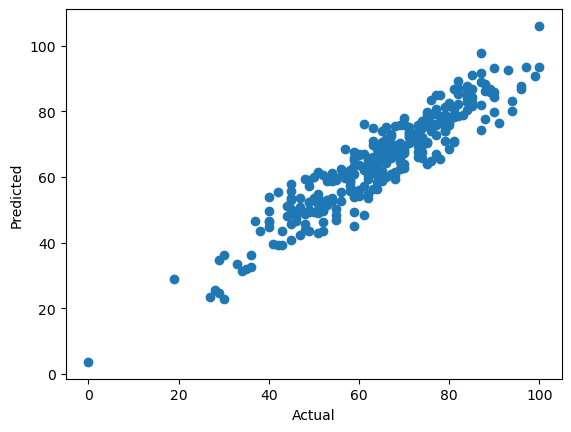

In [26]:
plt.scatter(Y_Test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [27]:
pred_df=pd.DataFrame({'Actual Value':Y_Test,'Predicted Value':y_pred,'Difference':Y_Test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.511652,14.488348
737,53,58.898180,-5.898180
740,80,76.938478,3.061522
660,74,76.965881,-2.965881
411,84,87.633152,-3.633152
...,...,...,...
468,77,72.854766,4.145234
935,70,62.606548,7.393452
428,65,58.650347,6.349653
7,40,44.841375,-4.841375
